In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import uproot

In [3]:
dfsData = []
dfsDataLite = []
with uproot.open('/home/mdicosta/Datasets/NormVarTrees/Train323154/AO2D.root') as f:
    print(f.keys())
    for iKey, key in enumerate(f.keys()):
        if 'O2hfcanddplite' in key:
            print(key)
            dfData = f[key].arrays(library='pd')
            dfsData.append(dfData)

full_df = pd.concat([df for df in dfsData], ignore_index=True)
print(f"len(full_df): {len(full_df)}")

['DF_2336853114038560;1', 'DF_2336853114038560/O2hfcanddplite;1', 'DF_2336960459657152;1', 'DF_2336960459657152/O2hfcanddplite;1', 'DF_2336982002836512;1', 'DF_2336982002836512/O2hfcanddplite;1', 'DF_2336986335323680;1', 'DF_2336986335323680/O2hfcanddplite;1', 'DF_2336990677038944;1', 'DF_2336990677038944/O2hfcanddplite;1', 'DF_2336990692252480;1', 'DF_2336990692252480/O2hfcanddplite;1', 'DF_2336990724482976;1', 'DF_2336990724482976/O2hfcanddplite;1', 'DF_2336995101311264;1', 'DF_2336995101311264/O2hfcanddplite;1', 'DF_2336883236155776;1', 'DF_2336883236155776/O2hfcanddplite;1', 'DF_2336883251126432;1', 'DF_2336883251126432/O2hfcanddplite;1']
DF_2336853114038560/O2hfcanddplite;1
DF_2336960459657152/O2hfcanddplite;1
DF_2336982002836512/O2hfcanddplite;1
DF_2336986335323680/O2hfcanddplite;1
DF_2336990677038944/O2hfcanddplite;1
DF_2336990692252480/O2hfcanddplite;1
DF_2336990724482976/O2hfcanddplite;1
DF_2336995101311264/O2hfcanddplite;1
DF_2336883236155776/O2hfcanddplite;1
DF_2336883251126

In [4]:
print(full_df.columns)

Index(['fChi2PCA', 'fDecayLength', 'fDecayLengthXY', 'fDecayLengthNormalised',
       'fDecayLengthXYNormalised', 'fPtProng0', 'fPtProng1', 'fPtProng2',
       'fImpactParameter0', 'fImpactParameter1', 'fImpactParameter2',
       'fImpactParameterZ0', 'fImpactParameterZ1', 'fImpactParameterZ2',
       'fNSigTpcPi0', 'fNSigTpcKa0', 'fNSigTofPi0', 'fNSigTofKa0',
       'fNSigTpcTofPi0', 'fNSigTpcTofKa0', 'fNSigTpcPi1', 'fNSigTpcKa1',
       'fNSigTofPi1', 'fNSigTofKa1', 'fNSigTpcTofPi1', 'fNSigTpcTofKa1',
       'fNSigTpcPi2', 'fNSigTpcKa2', 'fNSigTofPi2', 'fNSigTofKa2',
       'fNSigTpcTofPi2', 'fNSigTpcTofKa2', 'fCandidateSelFlag', 'fM', 'fPt',
       'fCpa', 'fCpaXY', 'fMaxNormalisedDeltaIP', 'fEta', 'fPhi', 'fY',
       'fFlagMcMatchRec', 'fOriginMcRec', 'fFlagMcDecayChanRec'],
      dtype='object')


/tmp/ipykernel_2182481/2653982967.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[i].legend()  # Add legend to the current axis


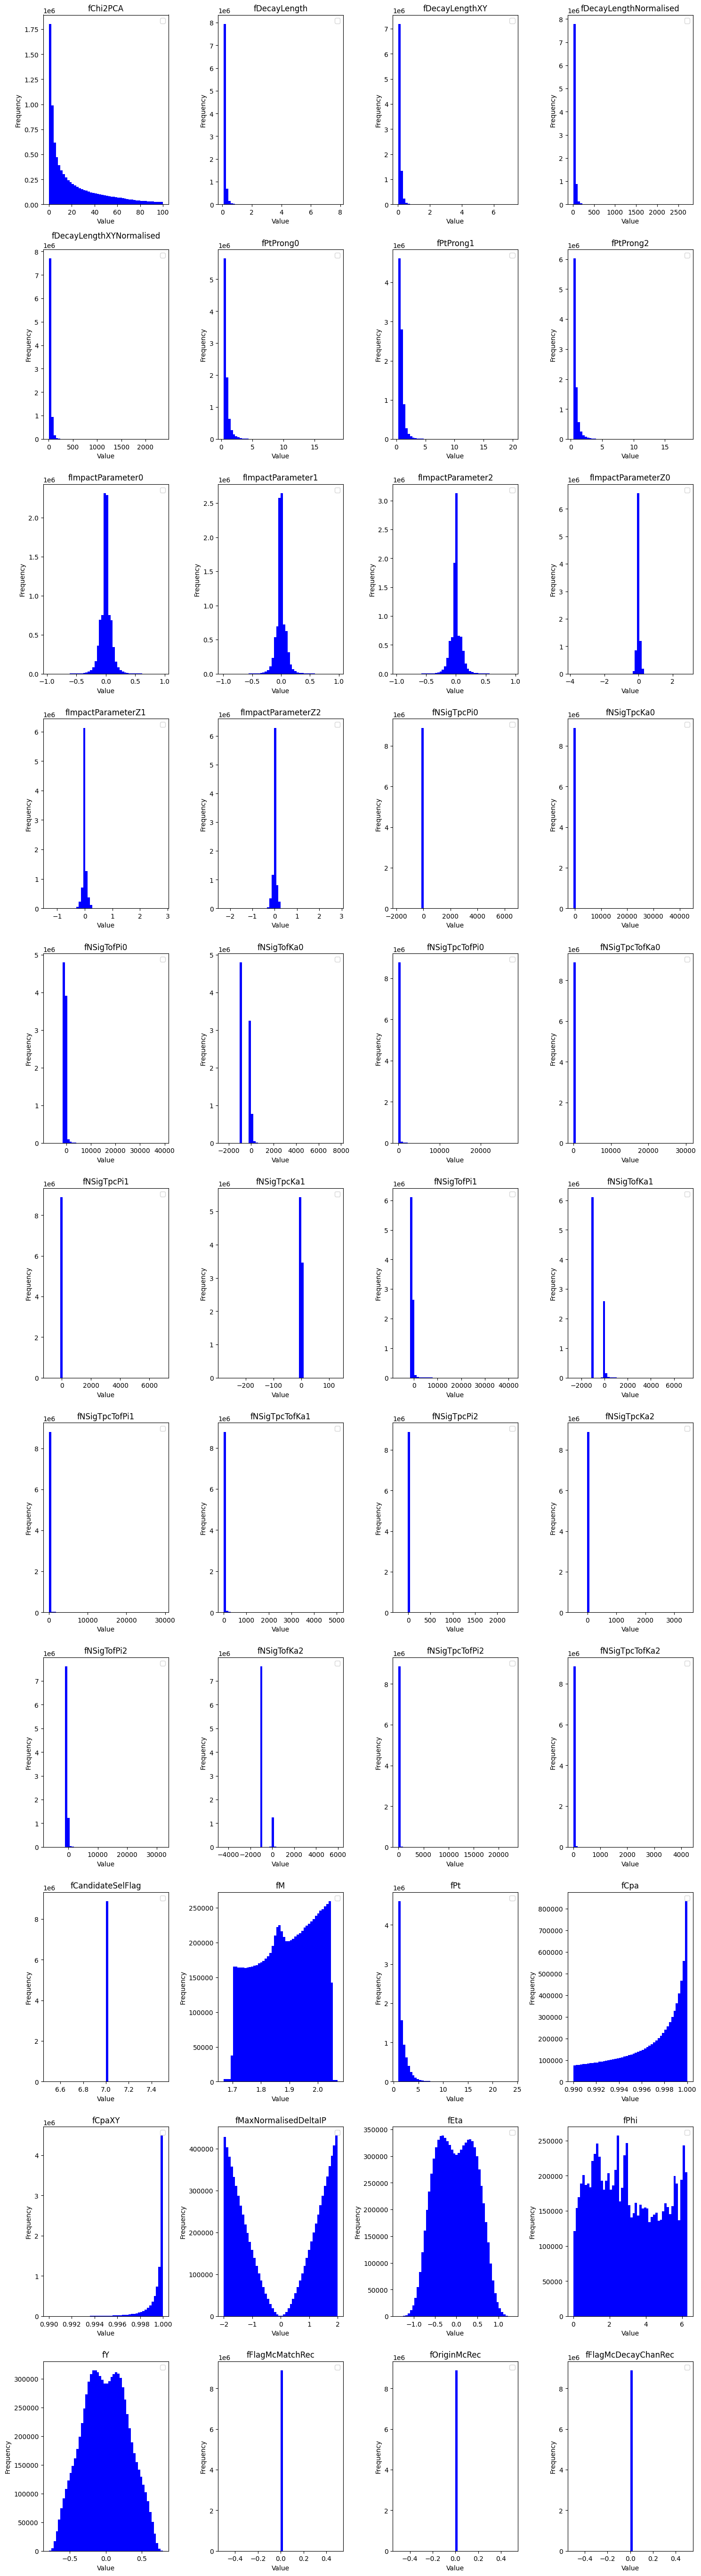

In [22]:
n_columns = len(full_df.columns)
n_rows = (n_columns // 4) + (1 if n_columns % 4 else 0)

fig, axes = plt.subplots(n_rows, 4, figsize=(15, 5 * n_rows))
axes = axes.flatten()
for i, column in enumerate(full_df.columns):
    axes[i].hist(full_df[column], bins=50, color='blue')
    axes[i].set_title(f'{column}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    # axes[i].set_yscale('log')
    axes[i].legend()  # Add legend to the current axis

# Remove unused axes if any
for i in range(n_columns, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

Number of entries between 1.0 and 12.0: 8876524
Number of entries between 8.0 and 24.0: 50836


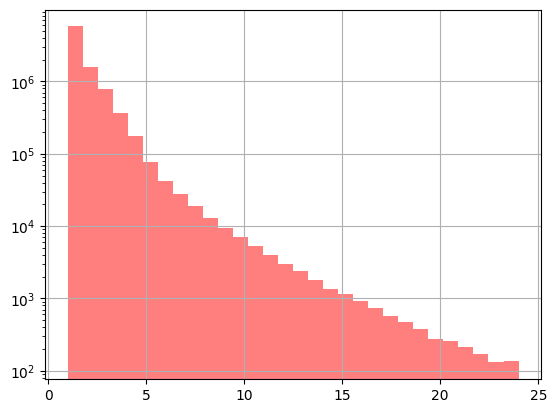

In [59]:
full_df['fPt'].hist(bins=30, color='red', alpha=0.5, label='Matched', log=True)

x_min = 1.0  # replace with your actual value
x_max = 12.0  # replace with your actual value

# Filter the DataFrame
count_in_range = full_df[(full_df['fPt'] >= x_min) & (full_df['fPt'] <= x_max)].shape[0]

print(f"Number of entries between {x_min} and {x_max}: {count_in_range}")

x_min = 8.0  # replace with your actual value
x_max = 24.0  # replace with your actual value

# Filter the DataFrame
count_in_range = full_df[(full_df['fPt'] >= x_min) & (full_df['fPt'] <= x_max)].shape[0]

print(f"Number of entries between {x_min} and {x_max}: {count_in_range}")

10         39.509182
11         25.284185
12         80.574196
13         20.989132
14         25.362003
             ...    
8889311    21.213440
8889312    43.108395
8889313    18.005373
8889314    24.119284
8889315    22.327839
Name: fDecayLengthXYNormalised, Length: 8889306, dtype: float32


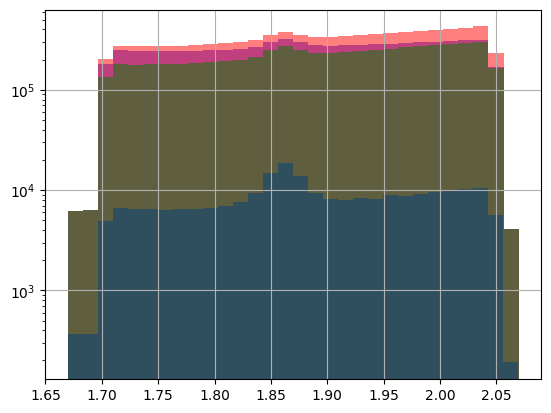

In [54]:
full_df['fM'].hist(bins=30, color='red', alpha=0.5, label='Matched', log=True)
full_df.query("fDecayLengthXYNormalised > 20")['fM'].hist(bins=30, color='purple', alpha=0.5, label='Matched')
full_df.query("abs(fMaxNormalisedDeltaIP) < 0.5")['fM'].hist(bins=30, color='blue', alpha=0.5, label='Matched', log=True)
full_df.query("fCpaXY >0.9995")['fM'].hist(bins=30, color='green', alpha=0.5, label='Matched')
print(full_df['fDecayLengthXYNormalised'][10:])

<Axes: >

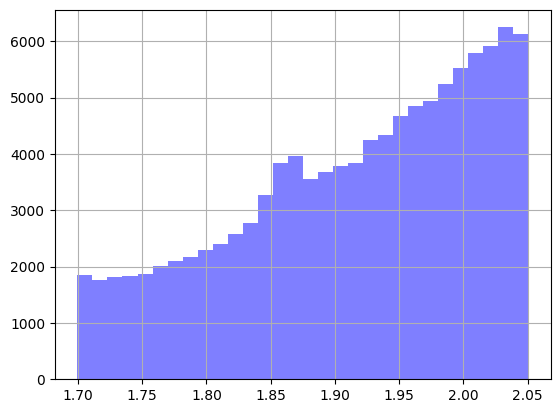

In [50]:
full_df.query("fPt >= 1 and fPt < 2 and fChi2PCA < 20 and abs(fMaxNormalisedDeltaIP) < 0.5")['fM'].hist(bins=30, color='blue', alpha=0.5, label='Matched')

<Axes: >

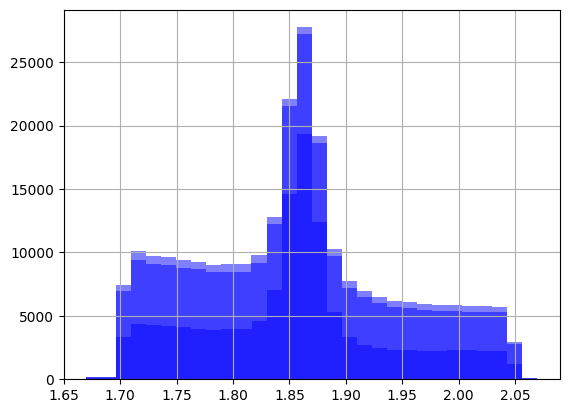

In [56]:
full_df.query("fPt >= 3 and fPt < 5 and abs(fMaxNormalisedDeltaIP) < 1.2")['fM'].hist(bins=30, color='blue', alpha=0.5, label='Matched')
full_df.query("fPt >= 3 and fPt < 5 and abs(fMaxNormalisedDeltaIP) < 1.2 and fCpa > 0.992")['fM'].hist(bins=30, color='blue', alpha=0.5, label='Matched')
full_df.query("fPt >= 3 and fPt < 5 and fChi2PCA < 10 and abs(fMaxNormalisedDeltaIP) < 1")['fM'].hist(bins=30, color='blue', alpha=0.5, label='Matched')

<Axes: >

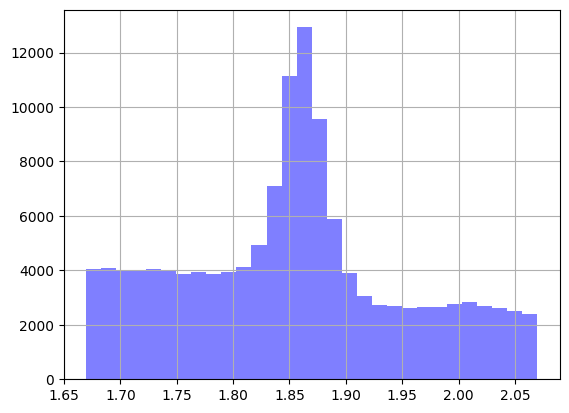

In [15]:
full_df.query("fPt >= 5 and fPt < 8 and fChi2PCA < 30 and abs(fMaxNormalisedDeltaIP) < 2")['fM'].hist(bins=30, color='blue', alpha=0.5, label='Matched')

<Axes: >

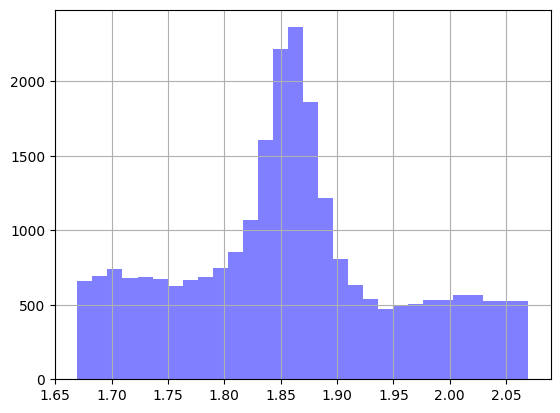

In [16]:
full_df.query("fPt >= 8 and fPt < 10 and fChi2PCA < 30 and abs(fMaxNormalisedDeltaIP) < 2")['fM'].hist(bins=30, color='blue', alpha=0.5, label='Matched')

<Axes: >

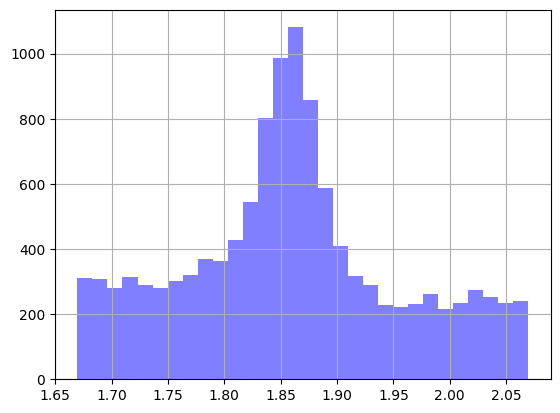

In [17]:
full_df.query("fPt >= 10 and fPt < 12 and fChi2PCA < 30 and abs(fMaxNormalisedDeltaIP) < 2")['fM'].hist(bins=30, color='blue', alpha=0.5, label='Matched')

<Axes: >

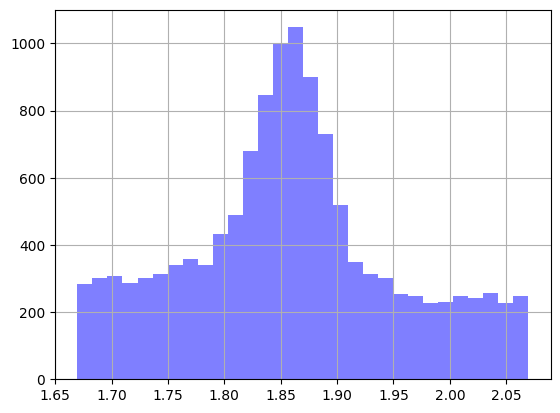

In [18]:
full_df.query("fPt >= 12 and fPt < 24 and fChi2PCA < 30 and abs(fMaxNormalisedDeltaIP) < 2")['fM'].hist(bins=30, color='blue', alpha=0.5, label='Matched')